#** Capstone Project**



Problem Statement 1:
 A retail store that has multiple outlets across the country are facing issues in managing the
 inventory - to match the demand with respect to supply.
 Dataset Information:
 The walmart.csv contains 6435 rows and 8 columns.

 1. You are provided with the weekly sales data for their various outlets. Use statistical
 analysis, EDA, outlier analysis, and handle the missing values to come up with various
 insights that can give them a clear perspective on the following:

    a. If the weekly sales are affected by the unemployment rate, if yes - which stores are suffering the most?

    b. If the weekly sales show a seasonal trend, when and what could be the reason?

    c. Does temperature affect the weekly sales in any manner?

    d. How is the Consumer Price index affecting the weekly sales of various stores?

    e. Top performing stores according to the historical data.

    f.The worst performing store, and how significant is the difference between the highest and lowest performing stores.
 2. Use predictive modeling techniques to forecast the sales for each store for the next 12
 weeks

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objects as go
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
df_Walmart = pd.read_csv('/content/Walmart DataSet.csv')

In [ ]:
df_Walmart

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1  05-02-2010    1643690.90             0        42.31       2.572   
1         1  12-02-2010    1641957.44             1        38.51       2.548   
2         1  19-02-2010    1611968.17             0        39.93       2.514   
3         1  26-02-2010    1409727.59             0        46.63       2.561   
4         1  05-03-2010    1554806.68             0        46.50       2.625   
...     ...         ...           ...           ...          ...         ...   
6430     45  28-09-2012     713173.95             0        64.88       3.997   
6431     45  05-10-2012     733455.07             0        64.89       3.985   
6432     45  12-10-2012     734464.36             0        54.47       4.000   
6433     45  19-10-2012     718125.53             0        56.47       3.969   
6434     45  26-10-2012     760281.43             0        58.85       3.882   

             CPI  Unemployment  
0     211.096358         8.106  
1     211.242170         8.106  
2     211.289143         8.106  
3     211.319643         8.106  
4     211.350143         8.106  
...          ...           ...  
6430  192.013558         8.684  
6431  192.170412         8.667  
6432  192.327265         8.667  
6433  192.330854         8.667  
6434  192.308899         8.667  

[6435 rows x 8 columns]

Basic EDA and Data Cleaning

In [ ]:
df_Walmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


Changing Data types

In [ ]:
#converting Date columns to data
df_Walmart['Date'] = pd.to_datetime(df_Walmart['Date'], format='%d-%m-%Y')

In [ ]:
#converting  Holiday flag to bool
df_Walmart['Holiday_Flag'] = df_Walmart['Holiday_Flag'].astype('category')

In [ ]:
#converting Store to category
df_Walmart['Store'] = df_Walmart['Store'].astype('category')

In [ ]:
# adding year column to
df_Walmart['Year'] = df_Walmart['Date'].dt.year

# adding week column to
df_Walmart['Week'] = df_Walmart['Date'].dt.isocalendar().week # Changed this line

# adding month column to
df_Walmart['Month'] = df_Walmart['Date'].dt.month
df_Walmart.head(5)

Store       Date  Weekly_Sales Holiday_Flag  Temperature  Fuel_Price  \
0     1 2010-02-05    1643690.90            0        42.31       2.572   
1     1 2010-02-12    1641957.44            1        38.51       2.548   
2     1 2010-02-19    1611968.17            0        39.93       2.514   
3     1 2010-02-26    1409727.59            0        46.63       2.561   
4     1 2010-03-05    1554806.68            0        46.50       2.625   

          CPI  Unemployment  Year  Week  Month  
0  211.096358         8.106  2010     5      2  
1  211.242170         8.106  2010     6      2  
2  211.289143         8.106  2010     7      2  
3  211.319643         8.106  2010     8      2  
4  211.350143         8.106  2010     9      3

In [ ]:
df_Walmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   category      
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   category      
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
 8   Year          6435 non-null   int32         
 9   Week          6435 non-null   UInt32        
 10  Month         6435 non-null   int32         
dtypes: UInt32(1), category(2), datetime64[ns](1), float64(5), int32(2)
memory usage: 397.5 KB


Checking NULL values

In [ ]:
df_Walmart.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
Year            0
Week            0
Month           0
dtype: int64




Reading the data for elementary Statistics

In [ ]:
df_Walmart.describe()

Date  Weekly_Sales  Temperature   Fuel_Price  \
count                 6435  6.435000e+03  6435.000000  6435.000000   
mean   2011-06-17 00:00:00  1.046965e+06    60.663782     3.358607   
min    2010-02-05 00:00:00  2.099862e+05    -2.060000     2.472000   
25%    2010-10-08 00:00:00  5.533501e+05    47.460000     2.933000   
50%    2011-06-17 00:00:00  9.607460e+05    62.670000     3.445000   
75%    2012-02-24 00:00:00  1.420159e+06    74.940000     3.735000   
max    2012-10-26 00:00:00  3.818686e+06   100.140000     4.468000   
std                    NaN  5.643666e+05    18.444933     0.459020   

               CPI  Unemployment         Year       Week        Month  
count  6435.000000   6435.000000  6435.000000     6435.0  6435.000000  
mean    171.578394      7.999151  2010.965035  25.818182     6.447552  
min     126.064000      3.879000  2010.000000        1.0     1.000000  
25%     131.735000      6.891000  2010.000000       14.0     4.000000  
50%     182.616521      7.874000  2011.000000       26.0     6.000000  
75%     212.743293      8.622000  2012.000000       38.0     9.000000  
max     227.232807     14.313000  2012.000000       52.0    12.000000  
std      39.356712      1.875885     0.797019  14.129201     3.238308

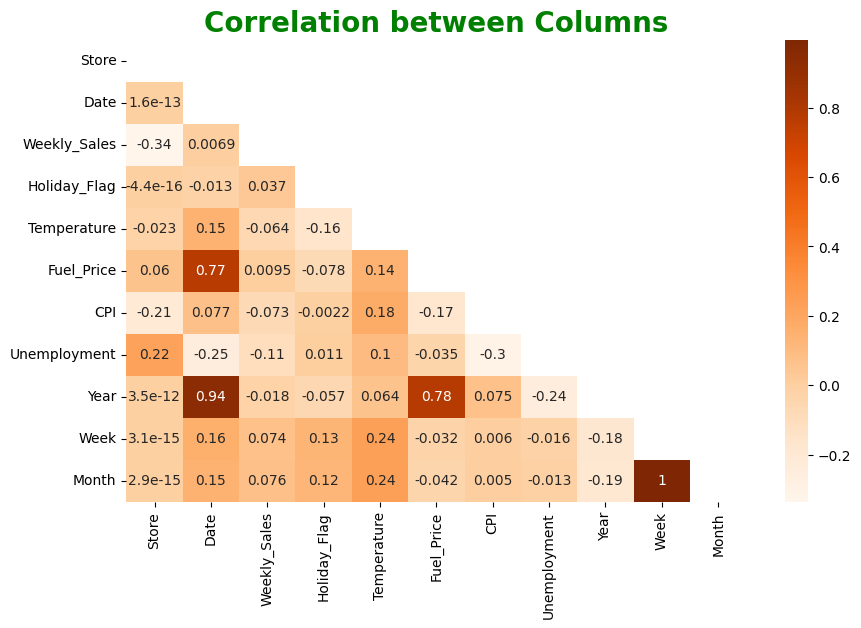

In [ ]:
#looking at correaltion between columns

plt.figure(figsize=(10,6))
heatmap_data = df_Walmart.corr()
mask = np.triu(np.ones_like(heatmap_data, dtype=bool))
sns.heatmap(heatmap_data,annot=True,cmap='Oranges',mask = mask)
plt.title("Correlation between Columns",fontdict={'fontsize':20,'color':'Green','fontweight':'bold'})
plt.show()


Outliers Detection

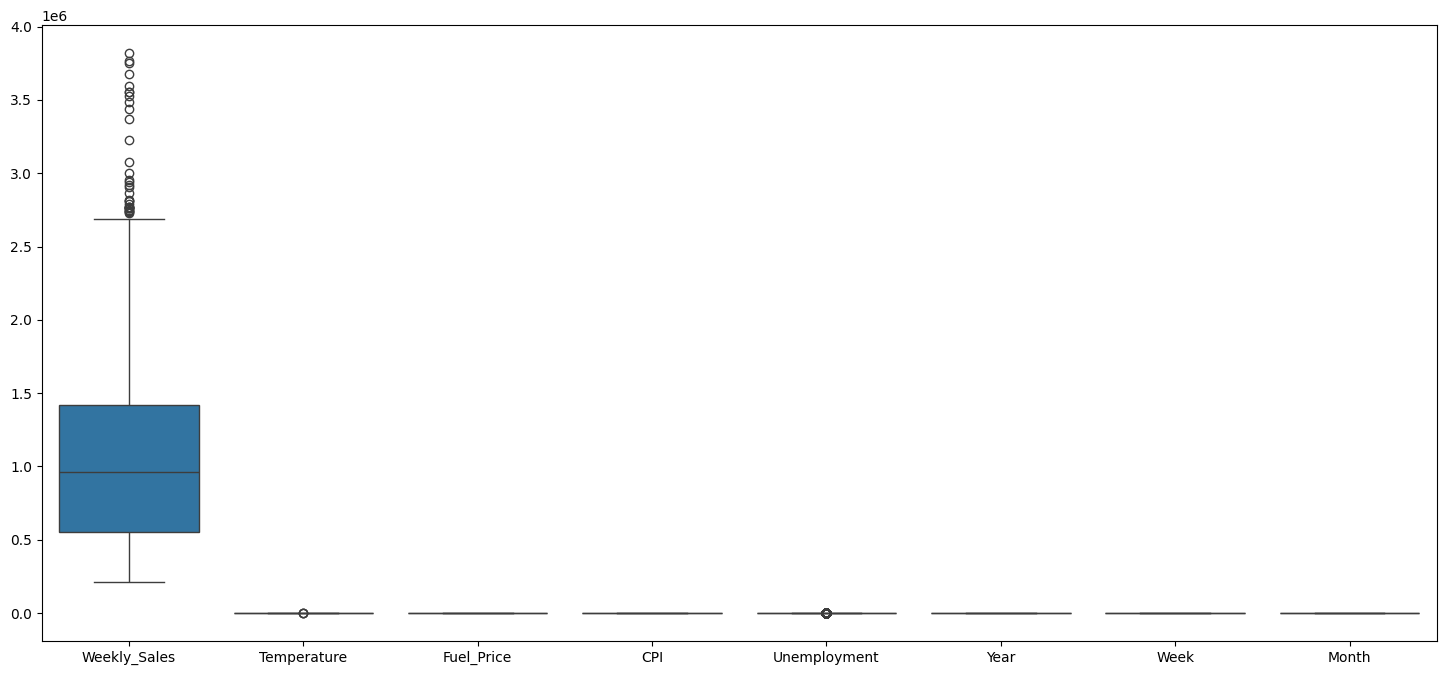

In [ ]:
# Using box plots
plt.figure(figsize=(18,8))
colours = sns.color_palette(n_colors=8)
sns.boxplot(data = df_Walmart,palette=colours)
plt.show()

Outlier Treament

In [ ]:
Q3 = df_Walmart['Weekly_Sales'].quantile(0.75)
Q1 = df_Walmart['Weekly_Sales'].quantile(0.25)
IQR = Q3-Q1
upperLimit = Q3+(1.5*IQR)
lowerLimit = Q1-(1.5*IQR)

In [ ]:
filt = ((df_Walmart['Weekly_Sales']<= upperLimit) & (df_Walmart['Weekly_Sales']>= lowerLimit))
df_Walmart = df_Walmart[filt]

In [ ]:
df_Walmart

Store       Date  Weekly_Sales Holiday_Flag  Temperature  Fuel_Price  \
0        1 2010-02-05    1643690.90            0        42.31       2.572   
1        1 2010-02-12    1641957.44            1        38.51       2.548   
2        1 2010-02-19    1611968.17            0        39.93       2.514   
3        1 2010-02-26    1409727.59            0        46.63       2.561   
4        1 2010-03-05    1554806.68            0        46.50       2.625   
...    ...        ...           ...          ...          ...         ...   
6430    45 2012-09-28     713173.95            0        64.88       3.997   
6431    45 2012-10-05     733455.07            0        64.89       3.985   
6432    45 2012-10-12     734464.36            0        54.47       4.000   
6433    45 2012-10-19     718125.53            0        56.47       3.969   
6434    45 2012-10-26     760281.43            0        58.85       3.882   

             CPI  Unemployment  Year  Week  Month  
0     211.096358         8.106  2010     5      2  
1     211.242170         8.106  2010     6      2  
2     211.289143         8.106  2010     7      2  
3     211.319643         8.106  2010     8      2  
4     211.350143         8.106  2010     9      3  
...          ...           ...   ...   ...    ...  
6430  192.013558         8.684  2012    39      9  
6431  192.170412         8.667  2012    40     10  
6432  192.327265         8.667  2012    41     10  
6433  192.330854         8.667  2012    42     10  
6434  192.308899         8.667  2012    43     10  

[6401 rows x 11 columns]

Checking for duplicate value

In [ ]:
df_Walmart.duplicated().sum()

0

If the Weekly_Sales are affected by the Unemployment Rate?


<font color="#000000"><h4>Correlation between WeeklySales and Unemployment Rate </font>

In [ ]:
#checking correaltion between Weekly Sales and Unemployment Rate
correlationCoeff = df_Walmart['Weekly_Sales'].corr(df_Walmart['Unemployment'])
print("The correlation coefficient of Weekly Sales and Unemployment Rate is : ",correlationCoeff)

The correlation coefficient of Weekly Sales and Unemployment Rate is :  -0.10429750912578388


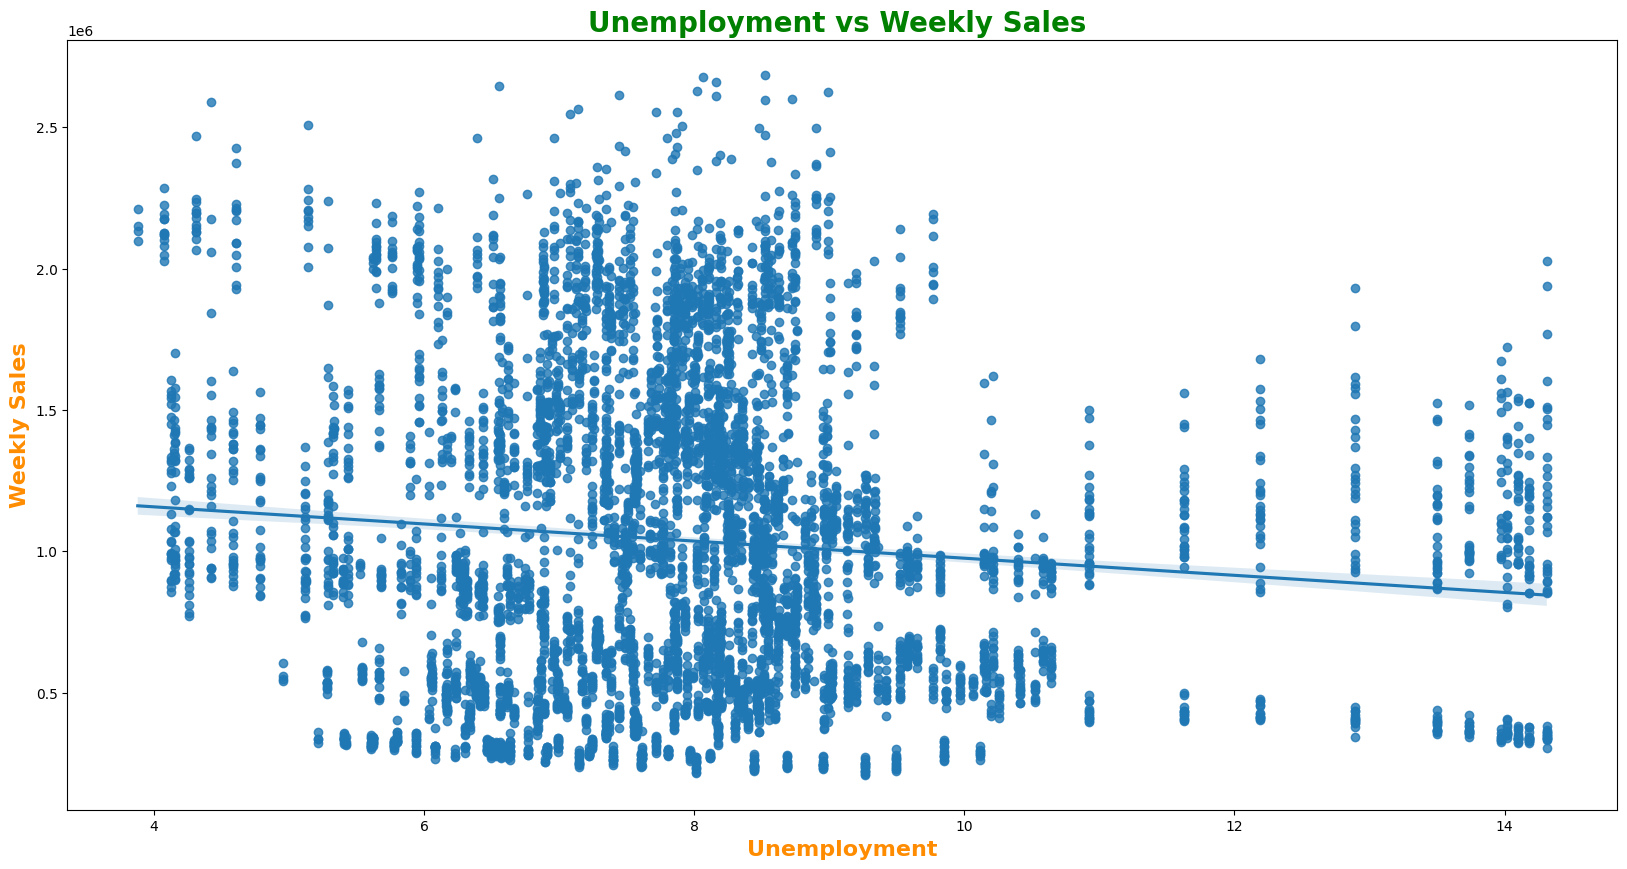

In [ ]:
#plotting the regression plot

plt.figure(figsize=(20,10))
sns.regplot(data = df_Walmart,x = 'Unemployment',y = 'Weekly_Sales')

# Set the title
plt.title('Unemployment vs Weekly Sales ',fontdict={'fontsize':20,'color':'Green','fontweight':'bold'})

# Set the x and y axis labels
plt.xlabel('Unemployment', color='#FF8C00',  fontweight='bold', fontsize=16)
plt.ylabel('Weekly Sales', color='#FF8C00',  fontweight='bold', fontsize=16)

plt.show()

Which Stores are suffering the most?

In [ ]:
# getting the correaltion between weekly sales and unemployment and sorting it
sortewise_correlation = df_Walmart.groupby('Store')[['Weekly_Sales', 'Unemployment']].corr().unstack().sort_values(by = ('Weekly_Sales','Unemployment')) # Changed this line to use a list instead of a tuple

#restting the index
sortewise_correlation.reset_index(inplace = True)

#creating filter
min_corr = sortewise_correlation[('Weekly_Sales','Unemployment')].min()
filt = (sortewise_correlation[('Weekly_Sales','Unemployment')]==min_corr)
store = sortewise_correlation.loc[filt, 'Store']
print("Stores with the Highest Negative Correlation with Unemployment Rate:",store[0])

Stores with the Highest Negative Correlation with Unemployment Rate: 38


If the Weekly_Sales show a seasonal trend?
When and what could be the reason?



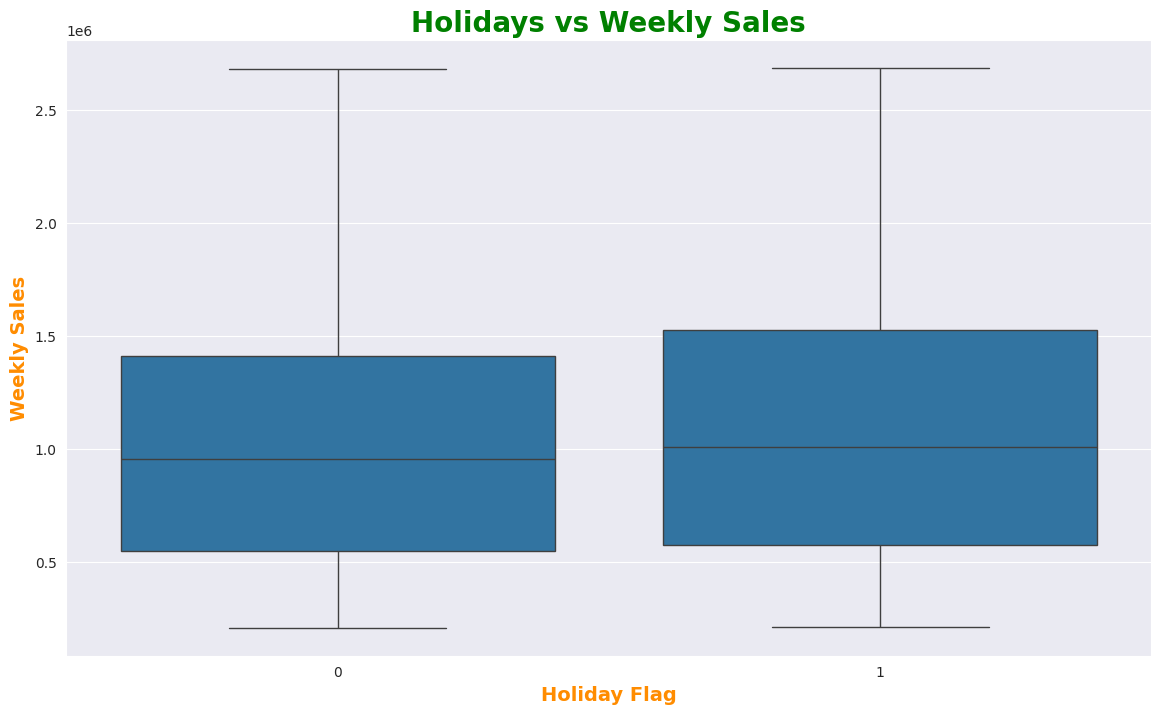

In [ ]:
# checking for holiday flag and how it affects weekly sales
plt.figure(figsize=(14,8))
sns.set_style('darkgrid')
sns.boxplot(data = df_Walmart,x = 'Holiday_Flag',y = 'Weekly_Sales')
plt.title("Holidays vs Weekly Sales",fontdict={'fontsize':20,'color':'Green','fontweight':'bold'})
plt.xlabel('Holiday Flag', color='#FF8C00',  fontweight='bold', fontsize=14)
plt.ylabel('Weekly Sales', color='#FF8C00',  fontweight='bold', fontsize=14)
plt.show()

Does temperature affect the Weekly_Sales in any manner?
    

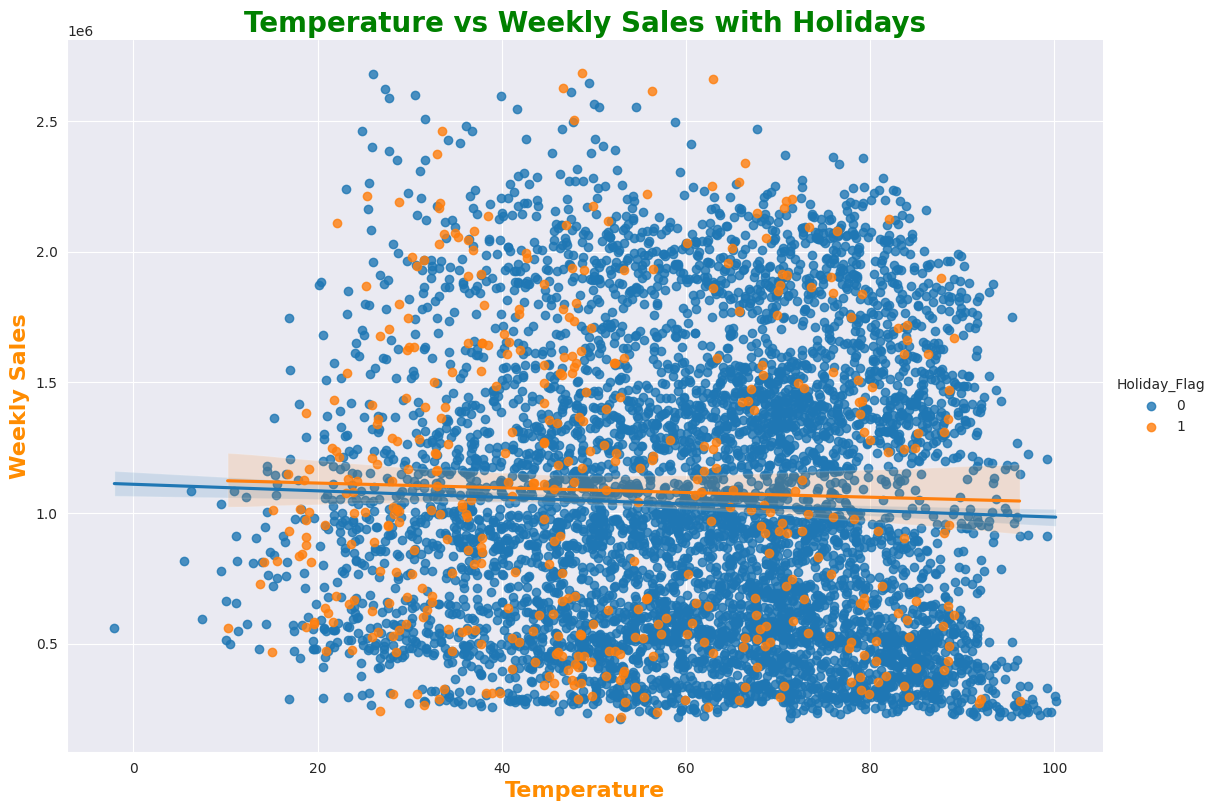

In [ ]:
# checking fortemperature and how it affects weekly sales with holiday flag
sns.set_style('darkgrid')
sns.lmplot(data = df_Walmart,x = 'Temperature',y = 'Weekly_Sales',hue='Holiday_Flag',height=8, aspect=1.4)
plt.title("Temperature vs Weekly Sales with Holidays",fontdict={'fontsize':20,'color':'Green','fontweight':'bold'})
plt.xlabel('Temperature', color='#FF8C00',  fontweight='bold', fontsize=16)
plt.ylabel('Weekly Sales', color='#FF8C00',  fontweight='bold', fontsize=16)
plt.show()

Changes in Temperature over time

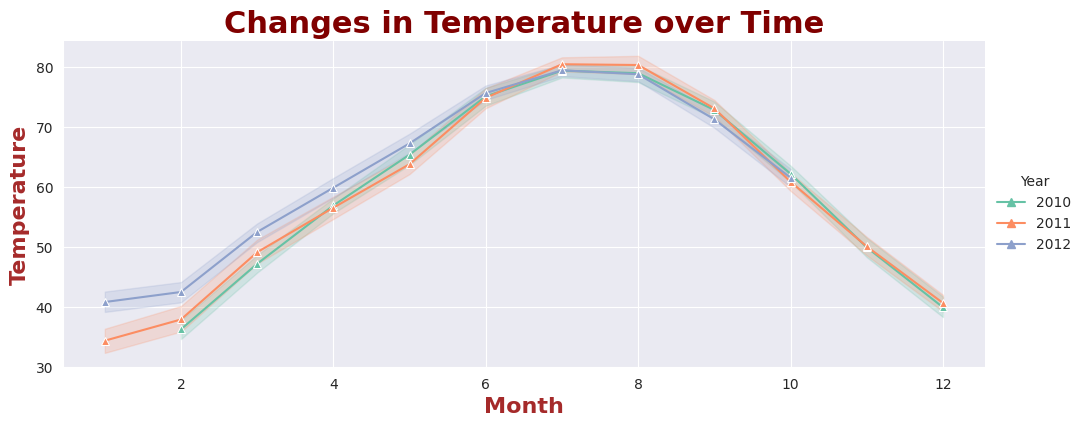

In [ ]:
sns.set_style('darkgrid')
sns.relplot(data = df_Walmart,x = 'Month',y = 'Temperature',hue='Year',
            kind = 'line',height = 4,aspect=2.5,palette='Set2',
            marker ='^')

# Set the title
plt.title('Changes in Temperature over Time', fontdict={'fontsize':22,'color':'Maroon','fontweight':'bold'})

# Set the x and y axis labels
plt.xlabel('Month', color='brown',fontweight='bold', fontsize=16)
plt.ylabel('Temperature', color='brown',fontweight='bold', fontsize=16)
plt.show()

How is the Consumer Price index (CPI) affecting the Weekly_Sales of various Stores?


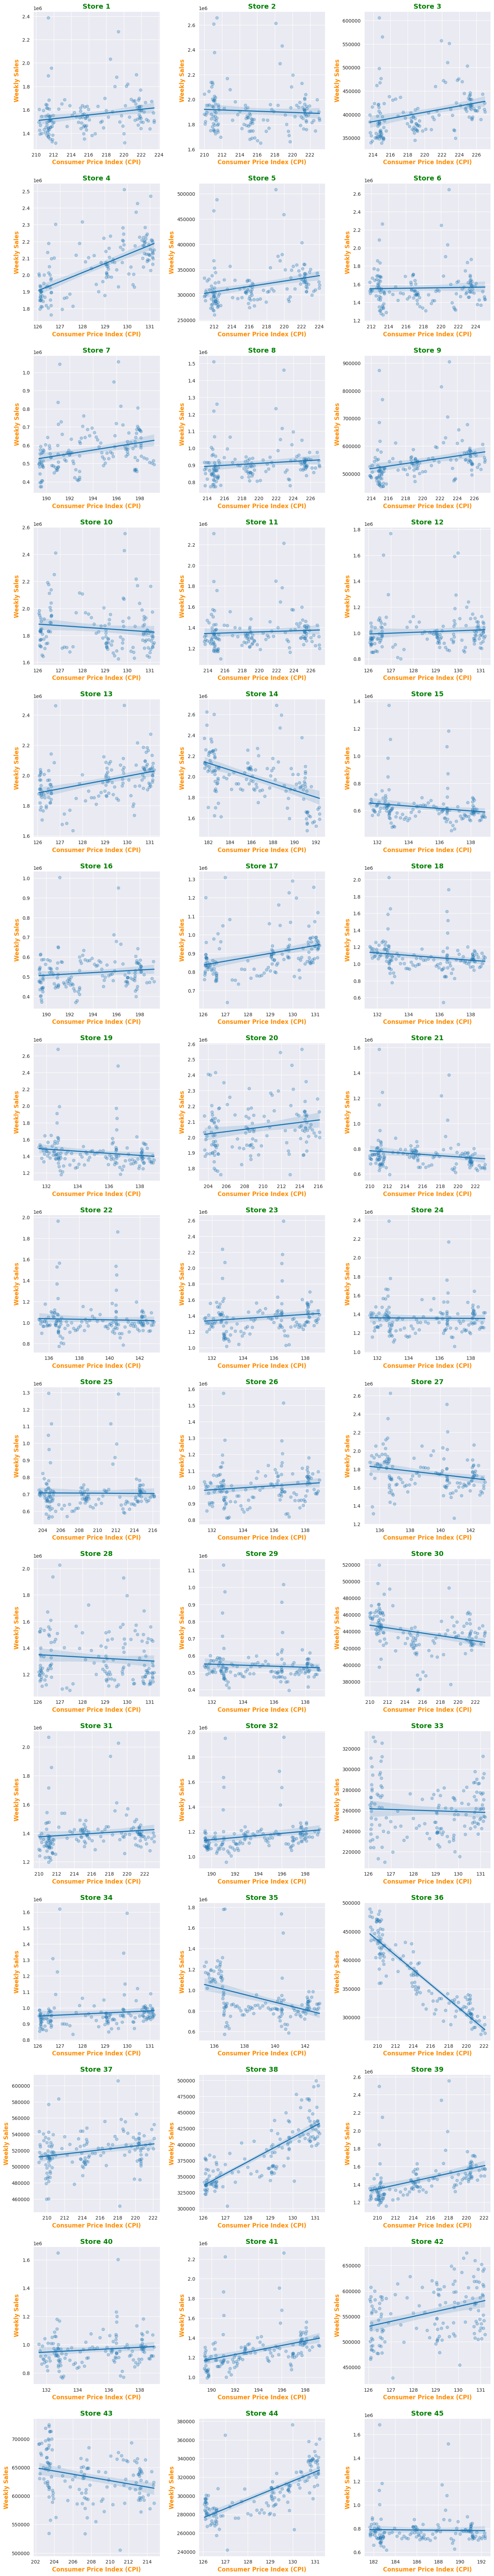

In [ ]:
# Create a list of unique store numbers
stores = df_Walmart['Store'].unique()

# Set up subplots

fig, axes = plt.subplots(nrows=len(stores)//3, ncols=3, figsize=(15, 5*len(stores)//3))
fig.tight_layout(pad=5.0)

# Iterate over each store and create a scatter plot
for i, store_num in enumerate(stores):
    row = i // 3
    col = i % 3
    ax = axes[row, col]

    # Filter the data for the specific store
    store_data = df_Walmart[df_Walmart['Store'] == store_num]

    # Plot scatter plot with regression line
    sns.set_style('darkgrid')
    sns.regplot(x='CPI', y='Weekly_Sales', data=store_data, ax=ax, scatter_kws={'alpha':0.3})

    ax.set_title(f'Store {store_num}',fontdict={'fontsize':14,'color':'Green','fontweight':'bold'})
    ax.set_xlabel('Consumer Price Index (CPI)', color='#FF8C00',  fontweight='bold', fontsize=12)
    ax.set_ylabel('Weekly Sales', color='#FF8C00', fontweight='bold', fontsize=12)

plt.show()

Changes in CPI (CONSUMER PRICE INDEX) over time

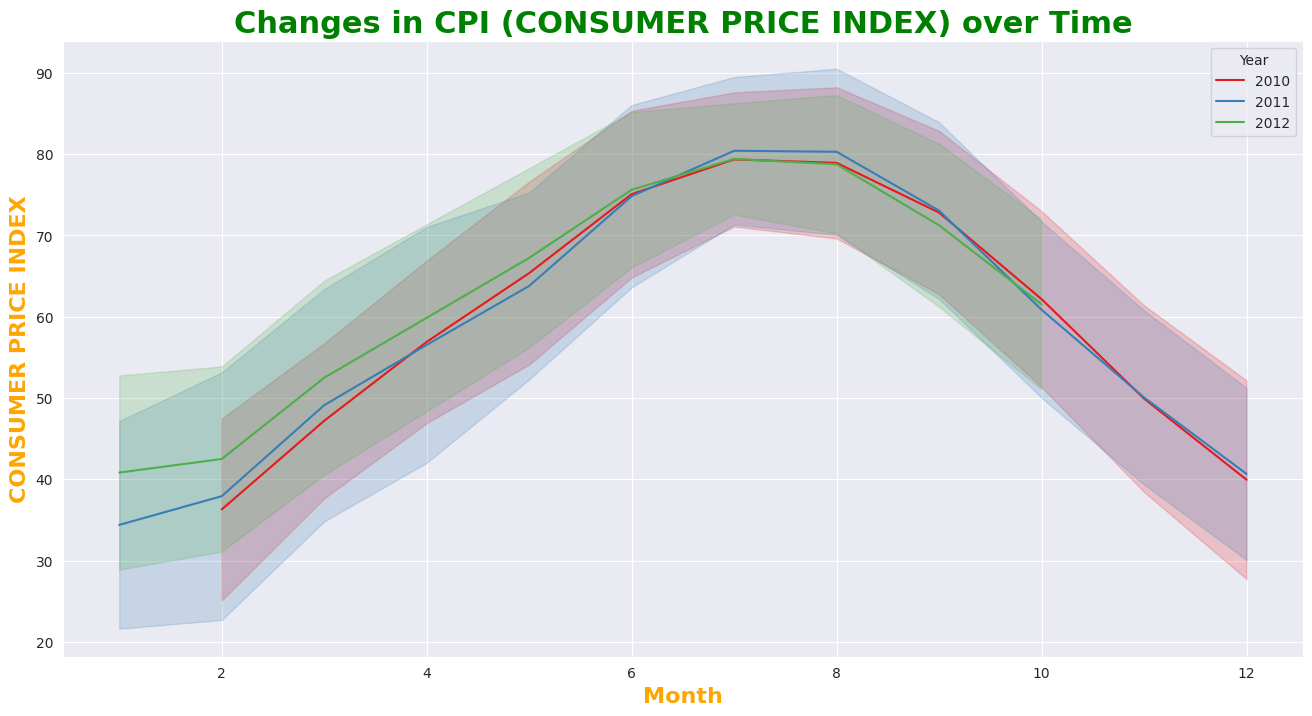

In [ ]:
plt.figure(figsize=(16,8))
sns.set_style('darkgrid')
sns.lineplot(
    data=df_Walmart,
    x='Month',
    y='Temperature',
    hue='Year',
    ci='sd',  # Specify the standard deviation for shading
    err_style='band',  # Use a shaded band for the confidence interval
    palette='Set1'
)

# Set the title
plt.title('Changes in CPI (CONSUMER PRICE INDEX) over Time', fontdict={'fontsize':22,'color':'Green','fontweight':'bold'})

# Set the x and y axis labels
plt.xlabel('Month', color='orange',fontweight='bold', fontsize=16)
plt.ylabel('CONSUMER PRICE INDEX', color='orange',fontweight='bold', fontsize=16)
plt.show()

How is the Fuel Prices are affecting the Weekly_Sales of various Stores?


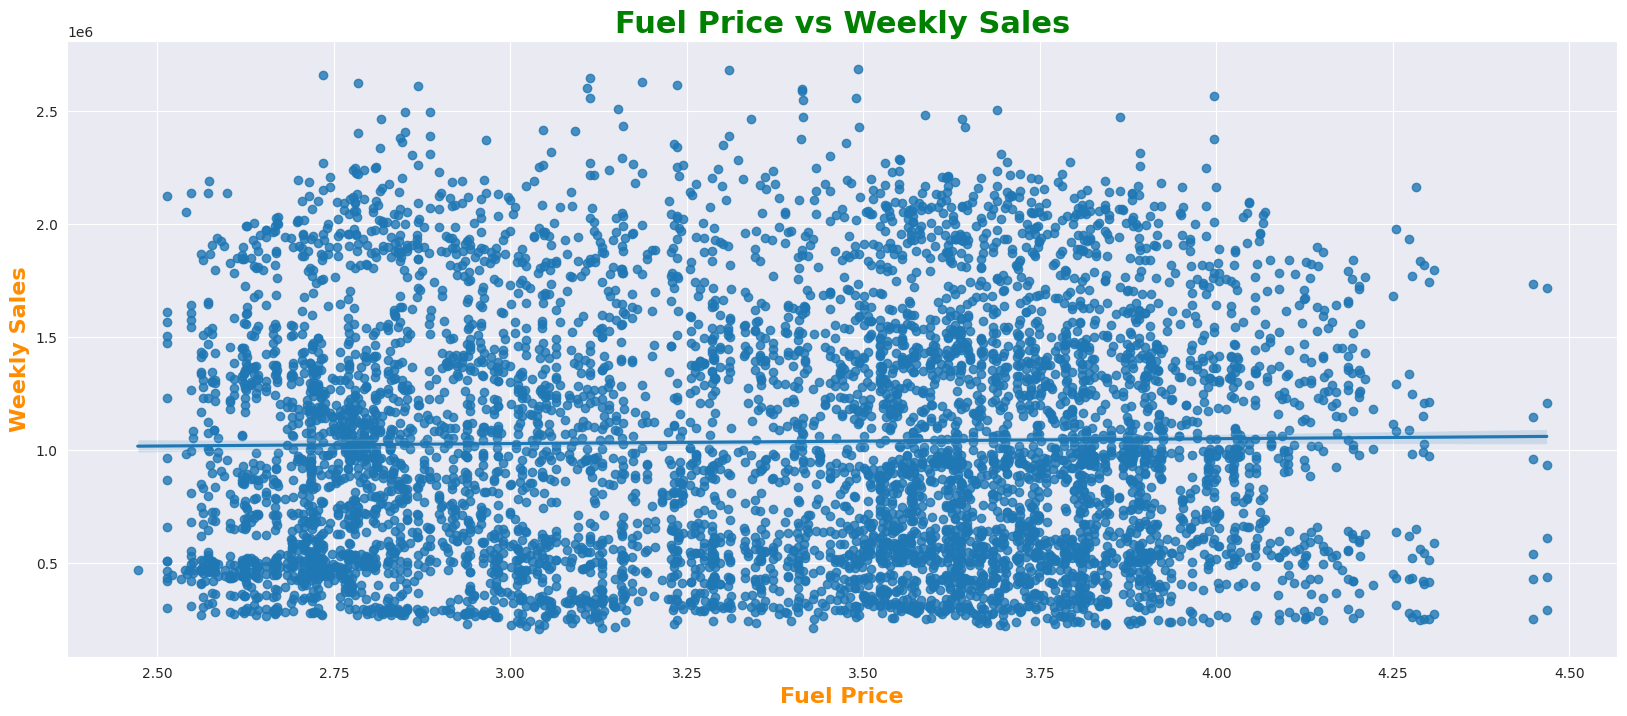

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(20,8))
sns.regplot(data = df_Walmart,x = 'Fuel_Price',y = 'Weekly_Sales')

# Set the title
plt.title('Fuel Price vs Weekly Sales', fontdict={'fontsize':22,'color':'Green','fontweight':'bold'})

# Set the x and y axis labels
plt.ylabel('Weekly Sales', color='#FF8C00',  fontweight='bold', fontsize=16)
plt.xlabel('Fuel Price', color='#FF8C00',  fontweight='bold', fontsize=16)

plt.show()

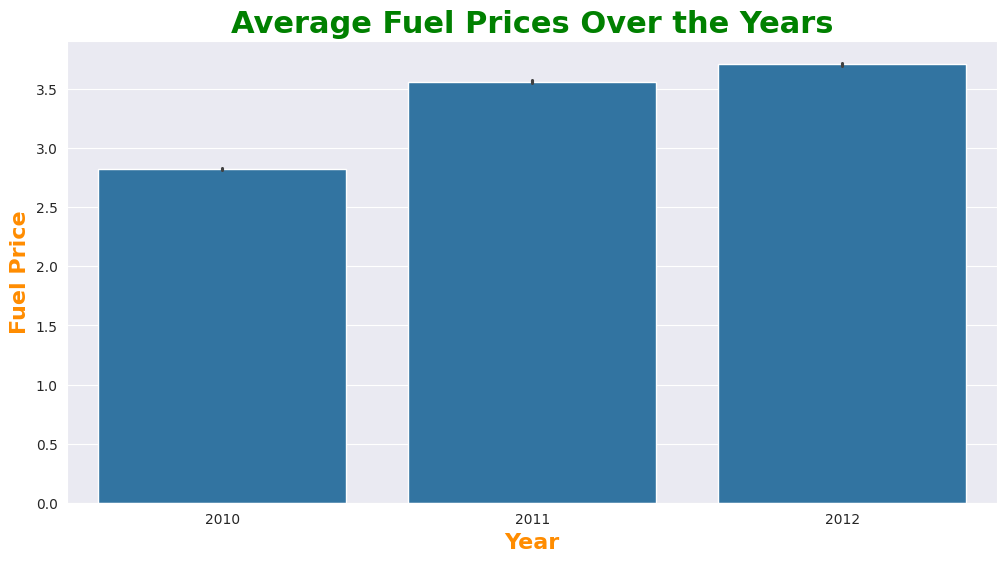

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,6))
sns.barplot(data = df_Walmart,x = 'Year',y = 'Fuel_Price')

# Set the title
plt.title('Average Fuel Prices Over the Years', fontdict={'fontsize':22,'color':'Green','fontweight':'bold'})

# Set the x and y axis labels
plt.xlabel('Year', color='#FF8C00',fontweight='bold', fontsize=16)
plt.ylabel('Fuel Price', color='#FF8C00',fontweight='bold', fontsize=16)

plt.show()

Relation between Date and Weekly Sales

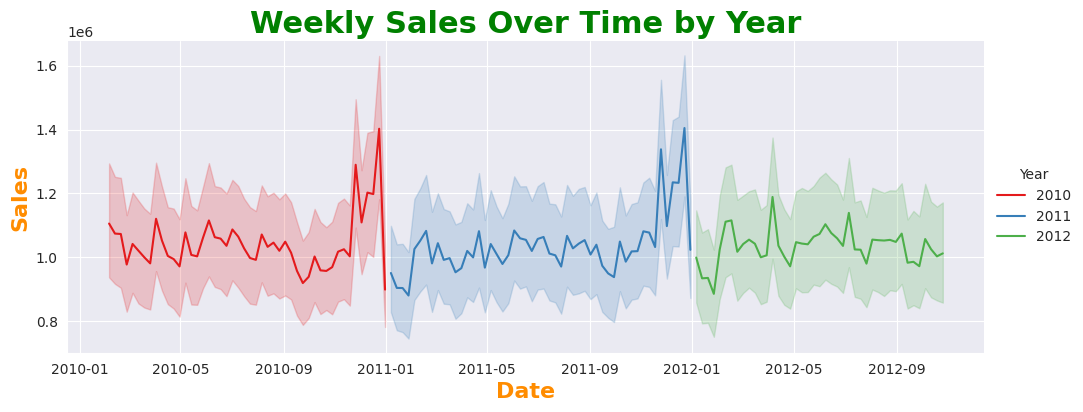

In [ ]:
sns.set_style('darkgrid')
sns.relplot(data = df_Walmart,x = 'Date',y = 'Weekly_Sales',hue='Year',kind = 'line',height = 4,aspect=2.5,palette='Set1')

# Set the title
plt.title('Weekly Sales Over Time by Year', fontdict={'fontsize':22,'color':'Green','fontweight':'bold'})

# Set the x and y axis labels
plt.xlabel('Date', color='#FF8C00',fontweight='bold', fontsize=16)
plt.ylabel('Sales', color='#FF8C00',fontweight='bold', fontsize=16)
plt.show()

Relation between Store and Weekly Sales

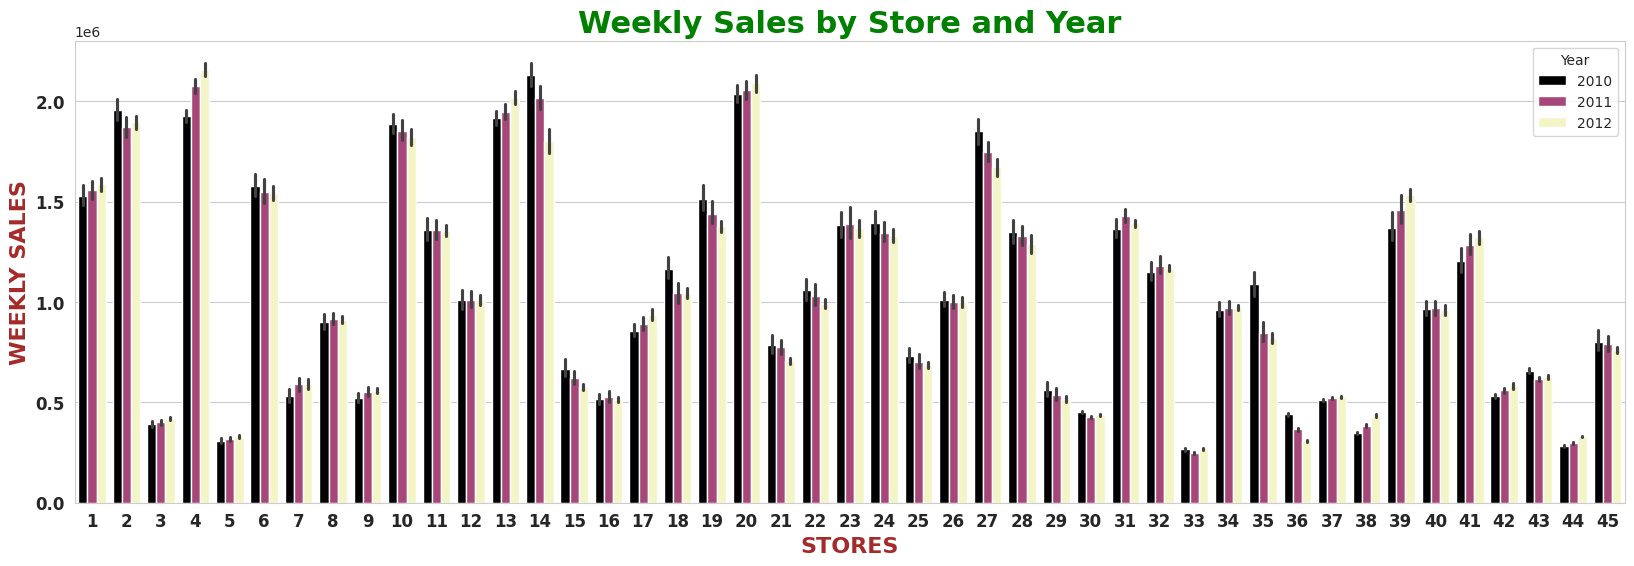

In [ ]:
plt.figure(figsize=(20,6))
sns.set_style('whitegrid')
sns.barplot(data = df_Walmart,x = 'Store',y = 'Weekly_Sales',hue ='Year',palette='magma' )

# Set the title
plt.title('Weekly Sales by Store and Year', fontdict={'fontsize':22,'color':'Green','fontweight':'bold'})

# Set the x and y axis labels
plt.xlabel('STORES', color='brown',fontweight='bold', fontsize=16)
plt.ylabel('WEEKLY SALES', color='brown',fontweight='bold', fontsize=16)
plt.xticks(fontweight='bold', fontsize=12)
plt.yticks(fontweight='bold', fontsize=12)
plt.show()

TOP Performing Stores according to the historical data

TOP Performing Stores Year wise according to the historical data

In [ ]:
#grouping the data Year wsie and then Store wise
performers = df_Walmart.groupby(['Year','Store']).agg(Yearly_Sales=('Weekly_Sales','sum')).reset_index()

best_store = pd.DataFrame()
# getting unique values in Year column
year = df_Walmart.Year.unique()
for i in year:
    # Filter the top performers for the current year
    filt = (performers['Year'] == i)
    max_sale = performers[filt]['Yearly_Sales'].max()
    mask = (performers['Yearly_Sales']==max_sale)
    best_store = pd.concat([best_store,performers[filt][mask]])

best_store.reset_index(drop = True,inplace=True)

#Changing the datatype to int for Store column
best_store['Store'] = best_store['Store'].astype('int')
unique_years = sorted(best_store['Year'].unique())
#plotting the graph for top performing stores
fig = px.bar(
    best_store,
    x='Year',
    y='Yearly_Sales',
    color='Store',
    color_discrete_sequence=px.colors.qualitative.Set1,
    category_orders={"Year": sorted(best_store['Year'].unique())},  # Enforce order without decimals

)
fig.update_layout(
        xaxis=dict(
        tickmode='array',
        tickvals=unique_years,
        dtick=1,  # Set the tick interval to 1 to display only integer values
),
    title='<b>Yearly Sales Trends: Top Performing Stores (2010-2012)</b>',
    xaxis_title='<b>Year</b>',
    yaxis_title='<b>Yearly Sales</b>',
    showlegend=True,
    font=dict(
        family="Arial, sans-serif",
        size=14,
        color="black"
    ),
    title_font=dict(
        family="Arial, sans-serif",
        size=22,
        color="green",
        )
)
fig.show()

WORST Performing Stores according to the historical data

In [ ]:
worst_store = pd.DataFrame()
# getting unique values in Year column
year = df_Walmart.Year.unique()
for i in year:
    # Filter the top performers for the current year
    filt = (performers['Year']==i)
    min_sale = performers[filt]['Yearly_Sales'].min()
    mask = (performers[filt]['Yearly_Sales']==min_sale)
    worst_store = pd.concat([worst_store,performers[filt][mask]])

worst_store.reset_index(drop = True,inplace=True)

#Changing the datatype to int for Store column
worst_store['Store'] = worst_store['Store'].astype('int')
unique_years = sorted(worst_store['Year'].unique())
#plotting the graph for top performing stores
fig = px.bar(
    worst_store,
    x='Year',
    y='Yearly_Sales',
    color='Store',
    color_discrete_sequence=px.colors.qualitative.Set1,
    category_orders={"Year": sorted(worst_store['Year'].unique())},  # Enforce order without decimals

)
fig.update_layout(
        xaxis=dict(
        tickmode='array',
        tickvals=unique_years,
        dtick=1,  # Set the tick interval to 1 to display only integer values
),
    title='<b>Yearly Sales Trends: Worst Performing Stores (2010-2012)</b>',
    xaxis_title='<b>Year</b>',
    yaxis_title='<b>Yearly Sales</b>',
    showlegend=True,
    font=dict(
        family="Arial, sans-serif",
        size=14,
        color="black"
    ),
    title_font=dict(
        family="Arial, sans-serif",
        size=22,
        color="green",
        )
)
fig.show()


How significant is the difference between the HIGHEST and LOWEST Performing Stores

In [ ]:
# To assess the significance of the difference between the highest and lowest performing stores
# we will calculate various statistical measures.

for i in year:
    filt = (performers['Year']==i)
    sales_range = performers[filt]['Yearly_Sales'].max() - performers[filt]['Yearly_Sales'].min()#range
    print('Stats for Yearly Sales in the year ',i)
    print('Range : ',sales_range)

    sales_mean = performers[filt]['Yearly_Sales'].mean() # Avg sales
    print('Average Sales : ',sales_mean)

    sales_std = performers[filt]['Yearly_Sales'].std()#std deviation
    print('Standtard Deviation : ',sales_std)

    cv = (sales_std / sales_mean) * 100#coefficient of Variance
    print('Relative Variance : ',cv)

    #percentile analysis
    sales_25th_percentile = performers[filt]['Yearly_Sales'].quantile(0.25)
    sales_75th_percentile = performers[filt]['Yearly_Sales'].quantile(0.75)
    print('25th_percentile : ',sales_25th_percentile)
    print('75th_percentile : ',sales_75th_percentile)
    print(' ')

Stats for Yearly Sales in the year  2010
Range :  83192150.55
Average Sales :  49501474.735999994
Standtard Deviation :  24543508.62317917
Relative Variance :  49.58136854320803
25th_percentile :  25568078.15
75th_percentile :  65782276.32
 
Stats for Yearly Sales in the year  2011
Range :  89769365.03999999
Average Sales :  53434914.90044444
Standtard Deviation :  26897017.527062986
Relative Variance :  50.33603511332488
25th_percentile :  29117302.669999998
75th_percentile :  74169225.52
 
Stats for Yearly Sales in the year  2012
Range :  81335638.21
Average Sales :  44447396.87444445
Standtard Deviation :  23019092.759410933
Relative Variance :  51.78951834780234
25th_percentile :  24827530.71
75th_percentile :  59212433.28
 


Distribution graph of columns

Temperature

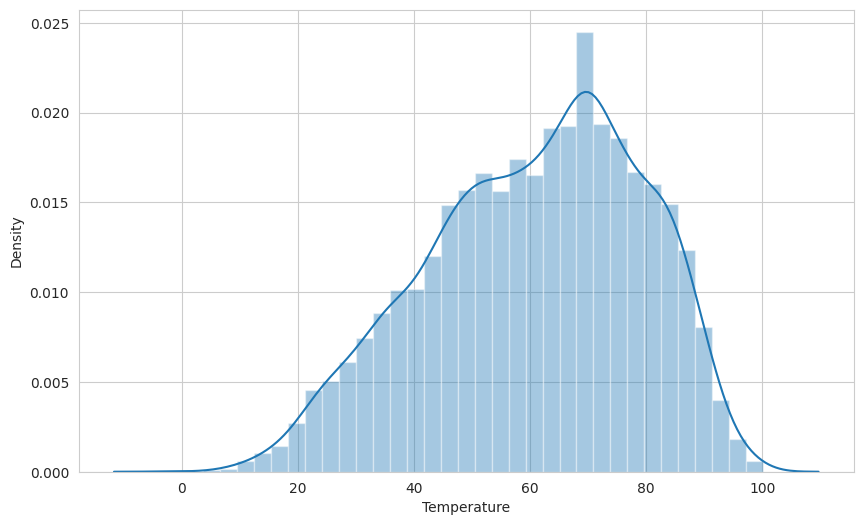

In [ ]:
plt.figure(figsize=(10,6))
sns.distplot(df_Walmart['Temperature'])
plt.show()

Fuel Price

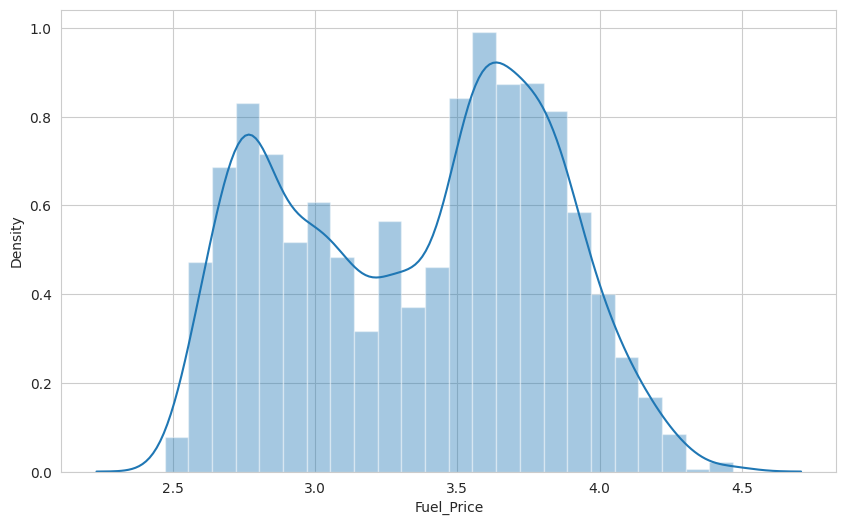

In [ ]:
plt.figure(figsize=(10,6))
sns.distplot(df_Walmart['Fuel_Price'])
plt.show()

CPI

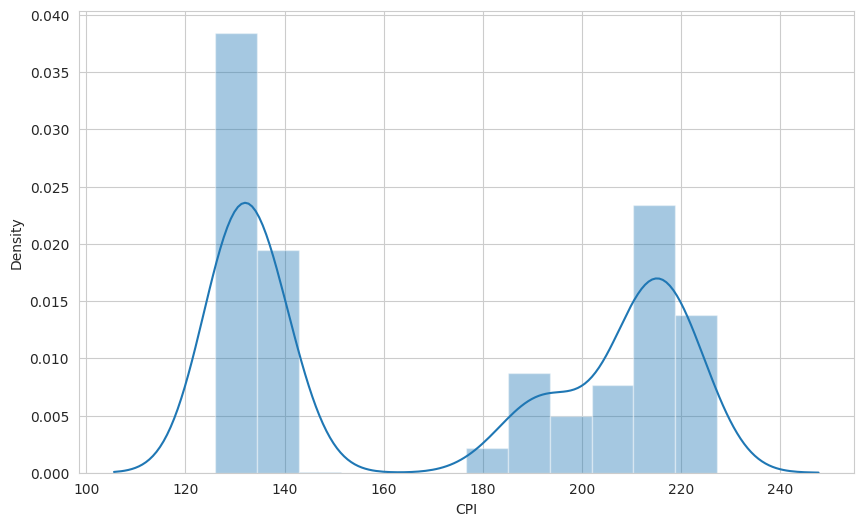

In [ ]:
plt.figure(figsize=(10,6))
sns.distplot(df_Walmart['CPI'])
plt.show()

Unemployment

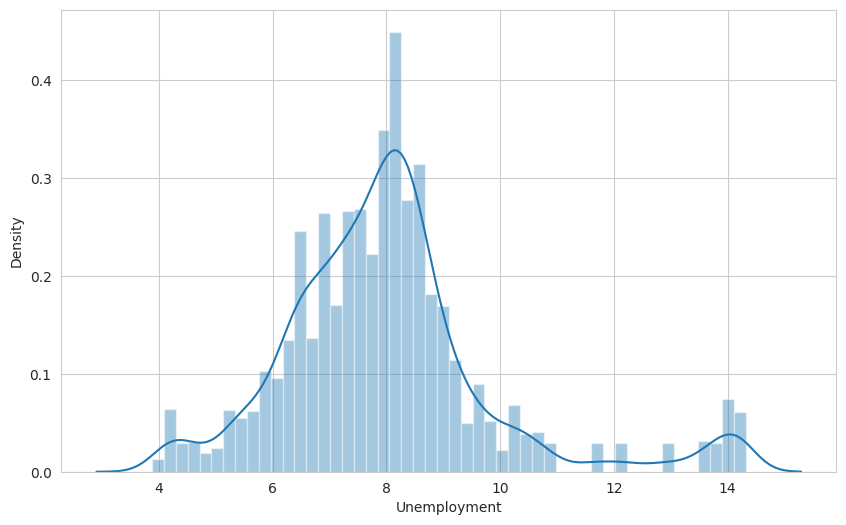

In [ ]:
plt.figure(figsize=(10,6))
sns.distplot(df_Walmart['Unemployment'])
plt.show()

In [ ]:
# Select only numerical columns for skewness calculation
numerical_cols = df_Walmart.select_dtypes(include=np.number).columns
df_Walmart_skew = df_Walmart[numerical_cols].skew()

# Display the skewness values
print(df_Walmart_skew)

Weekly_Sales    0.497428
Temperature    -0.344571
Fuel_Price     -0.101046
CPI             0.061319
Unemployment    1.186512
Year            0.057389
Week            0.053345
Month           0.042542
dtype: Float64


VIF check for multicolinearity

In [ ]:
lst = list(df_Walmart.columns)
lst.remove('Weekly_Sales')
lst.remove('Store')
lst.remove('Holiday_Flag')
lst.remove('Date')
X = df_Walmart[lst]
y = df_Walmart['Weekly_Sales']


In [ ]:
# Ensure all columns in X are numeric
X = X.apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values
X = X.dropna()

# Check if X is empty
if X.empty:
    raise ValueError("No valid data after processing. Ensure your data contains numeric values.")

# Reset index after dropping rows
X = X.reset_index(drop=True)

# VIF dataframe


In [ ]:
#we can drop year,month,week columns as those columns were not there in the original data
df_Walmart.drop(columns=['Year','Week','Month'],inplace = True)

Insights from distribution and skewness for selection of transformers

Temprature & Fuel need PowerTransformer

Unemployment needs FunctionTransformer

To select features we need to do a statistical assement to remove multicollinear columns

In [ ]:
X = df_Walmart[['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']]
y = df_Walmart['Weekly_Sales']

model = sm.OLS(y, sm.add_constant(X)).fit()

In [ ]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Weekly_Sales   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     36.53
Date:                Fri, 27 Dec 2024   Prob (F-statistic):           3.06e-30
Time:                        17:31:54   Log-Likelihood:                -93560.
No. Observations:                6401   AIC:                         1.871e+05
Df Residuals:                    6396   BIC:                         1.872e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.651e+06   7.72e+04     21.378   

We will select models which are robust to multicollinearity or handle it gracefully

Decision Tree
Random Forest
XGBoost
      
    

Predictive Models

FEATURE TRANSFORMATION AND SELECTION

Feature Transformation and Predicting

In [ ]:
#setting Date column to index
df_Walmart.set_index('Date',inplace = True)

In [ ]:
df_Walmart.head()

Store  Weekly_Sales Holiday_Flag  Temperature  Fuel_Price  \
Date                                                                   
2010-02-05     1    1643690.90            0        42.31       2.572   
2010-02-12     1    1641957.44            1        38.51       2.548   
2010-02-19     1    1611968.17            0        39.93       2.514   
2010-02-26     1    1409727.59            0        46.63       2.561   
2010-03-05     1    1554806.68            0        46.50       2.625   

                   CPI  Unemployment  
Date                                  
2010-02-05  211.096358         8.106  
2010-02-12  211.242170         8.106  
2010-02-19  211.289143         8.106  
2010-02-26  211.319643         8.106  
2010-03-05  211.350143         8.106

In [ ]:
lst = list(df_Walmart.columns)
lst.remove('Weekly_Sales')
X = df_Walmart[lst]
y = df_Walmart['Weekly_Sales']

In [ ]:
function_list = ['Unemployment']
power_list = ['Temperature','Fuel_Price']
skip_list = ['Store','Holiday_Flag','CPI']

In [ ]:
transformers = [('function',FunctionTransformer(np.log1p),function_list),
               ('power',PowerTransformer(),power_list),
               ('skip','passthrough',skip_list)]

In [ ]:
column_Transformer = ColumnTransformer(transformers=transformers,remainder = 'passthrough')

In [72]:
!pip install scikit-learn>=1.0.2
!pip install xgboost>=1.7.0

In [77]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import pandas as pd

# Define a basic column transformer (replace with actual preprocessing if needed)
column_Transformer = ColumnTransformer(transformers=[], remainder='passthrough')

# Define models and their respective hyperparameter grids
models = {
    'Decision Tree': (DecisionTreeRegressor(), {'model__max_depth': [None, 5, 10, 15]}),
    'Random Forest': (RandomForestRegressor(), {'model__n_estimators': [10, 50, 100], 'model__max_depth': [None, 5, 10]}),
    'XGBoost': (XGBRegressor(eval_metric='rmse'),  # Added necessary parameter
                {'model__n_estimators': [50, 100, 200], 'model__max_depth': [3, 5, 7]})
}

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Initialize an empty list to store results
results = []

# Perform hyperparameter tuning and evaluation for each model
for model_name, (model, param_grid) in models.items():
    pipeline = Pipeline([
        ('preprocessing', column_Transformer),  # Add preprocessing steps
        ('model', model),
    ])

    # Create a GridSearchCV object
    grid_search = GridSearchCV(
        pipeline,
        param_grid,
        scoring='r2',  # Use R2 score as the scoring metric
        cv=5,  # 5-fold cross-validation
        n_jobs=-1  # Use all available CPU cores
    )

    # Fit the GridSearchCV object on the training data
    grid_search.fit(X_train, y_train)

    # Get the best hyperparameters and score
    best_params = grid_search.best_params_
    best_r2 = grid_search.best_score_
    print(f"{model_name} - Best Hyperparameters: {best_params}, Best R2 Score: {best_r2}")

    # Make predictions on the test set using the best model
    y_pred = grid_search.predict(X_test)

    # Evaluate the model on the test set
    r2 = r2_score(y_test, y_pred)

    # Store results
    results.append({
        'Model': model_name,
        'Best Hyperparameters': best_params,
        'R2 Score': r2,
        'y_test': y_test.tolist(),  # Convert to list for storage
        'y_pred': y_pred.tolist()   # Convert to list for storage
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Display results
print(results_df)


Decision Tree - Best Hyperparameters: {'model__max_depth': 10}, Best R2 Score: 0.9187877516526788
Random Forest - Best Hyperparameters: {'model__max_depth': None, 'model__n_estimators': 100}, Best R2 Score: 0.9458483807890973
XGBoost - Best Hyperparameters: {'model__max_depth': 3, 'model__n_estimators': 50}, Best R2 Score: nan


AttributeError: 'super' object has no attribute '__sklearn_tags__'

In [ ]:
# Display the results DataFrame
results_df


In [78]:
for i, row in results_df.iterrows():
    plt.figure(figsize=(8, 6))
    sns.regplot(x=row['y_test'], y=row['y_pred'], line_kws={'color': 'red', 'linestyle': '--', 'linewidth': 2})
    plt.title(f"{row['Model']} - Actual vs Predicted",fontdict={'fontsize':20,'color':'Green','fontweight':'bold'})
    plt.xlabel('Actual (y_test)',fontdict={'fontsize':14,'color':'orange','fontweight':'bold'})
    plt.ylabel('Predicted (y_pred)',fontdict={'fontsize':14,'color':'orange','fontweight':'bold'})
    plt.xticks(fontweight='bold', fontsize=12)
    plt.yticks(fontweight='bold', fontsize=12)
    plt.show()

FORECAST the Weekly_Sales for each Stores for the NEXT 12 WEEKS.

Time Series for foracsting

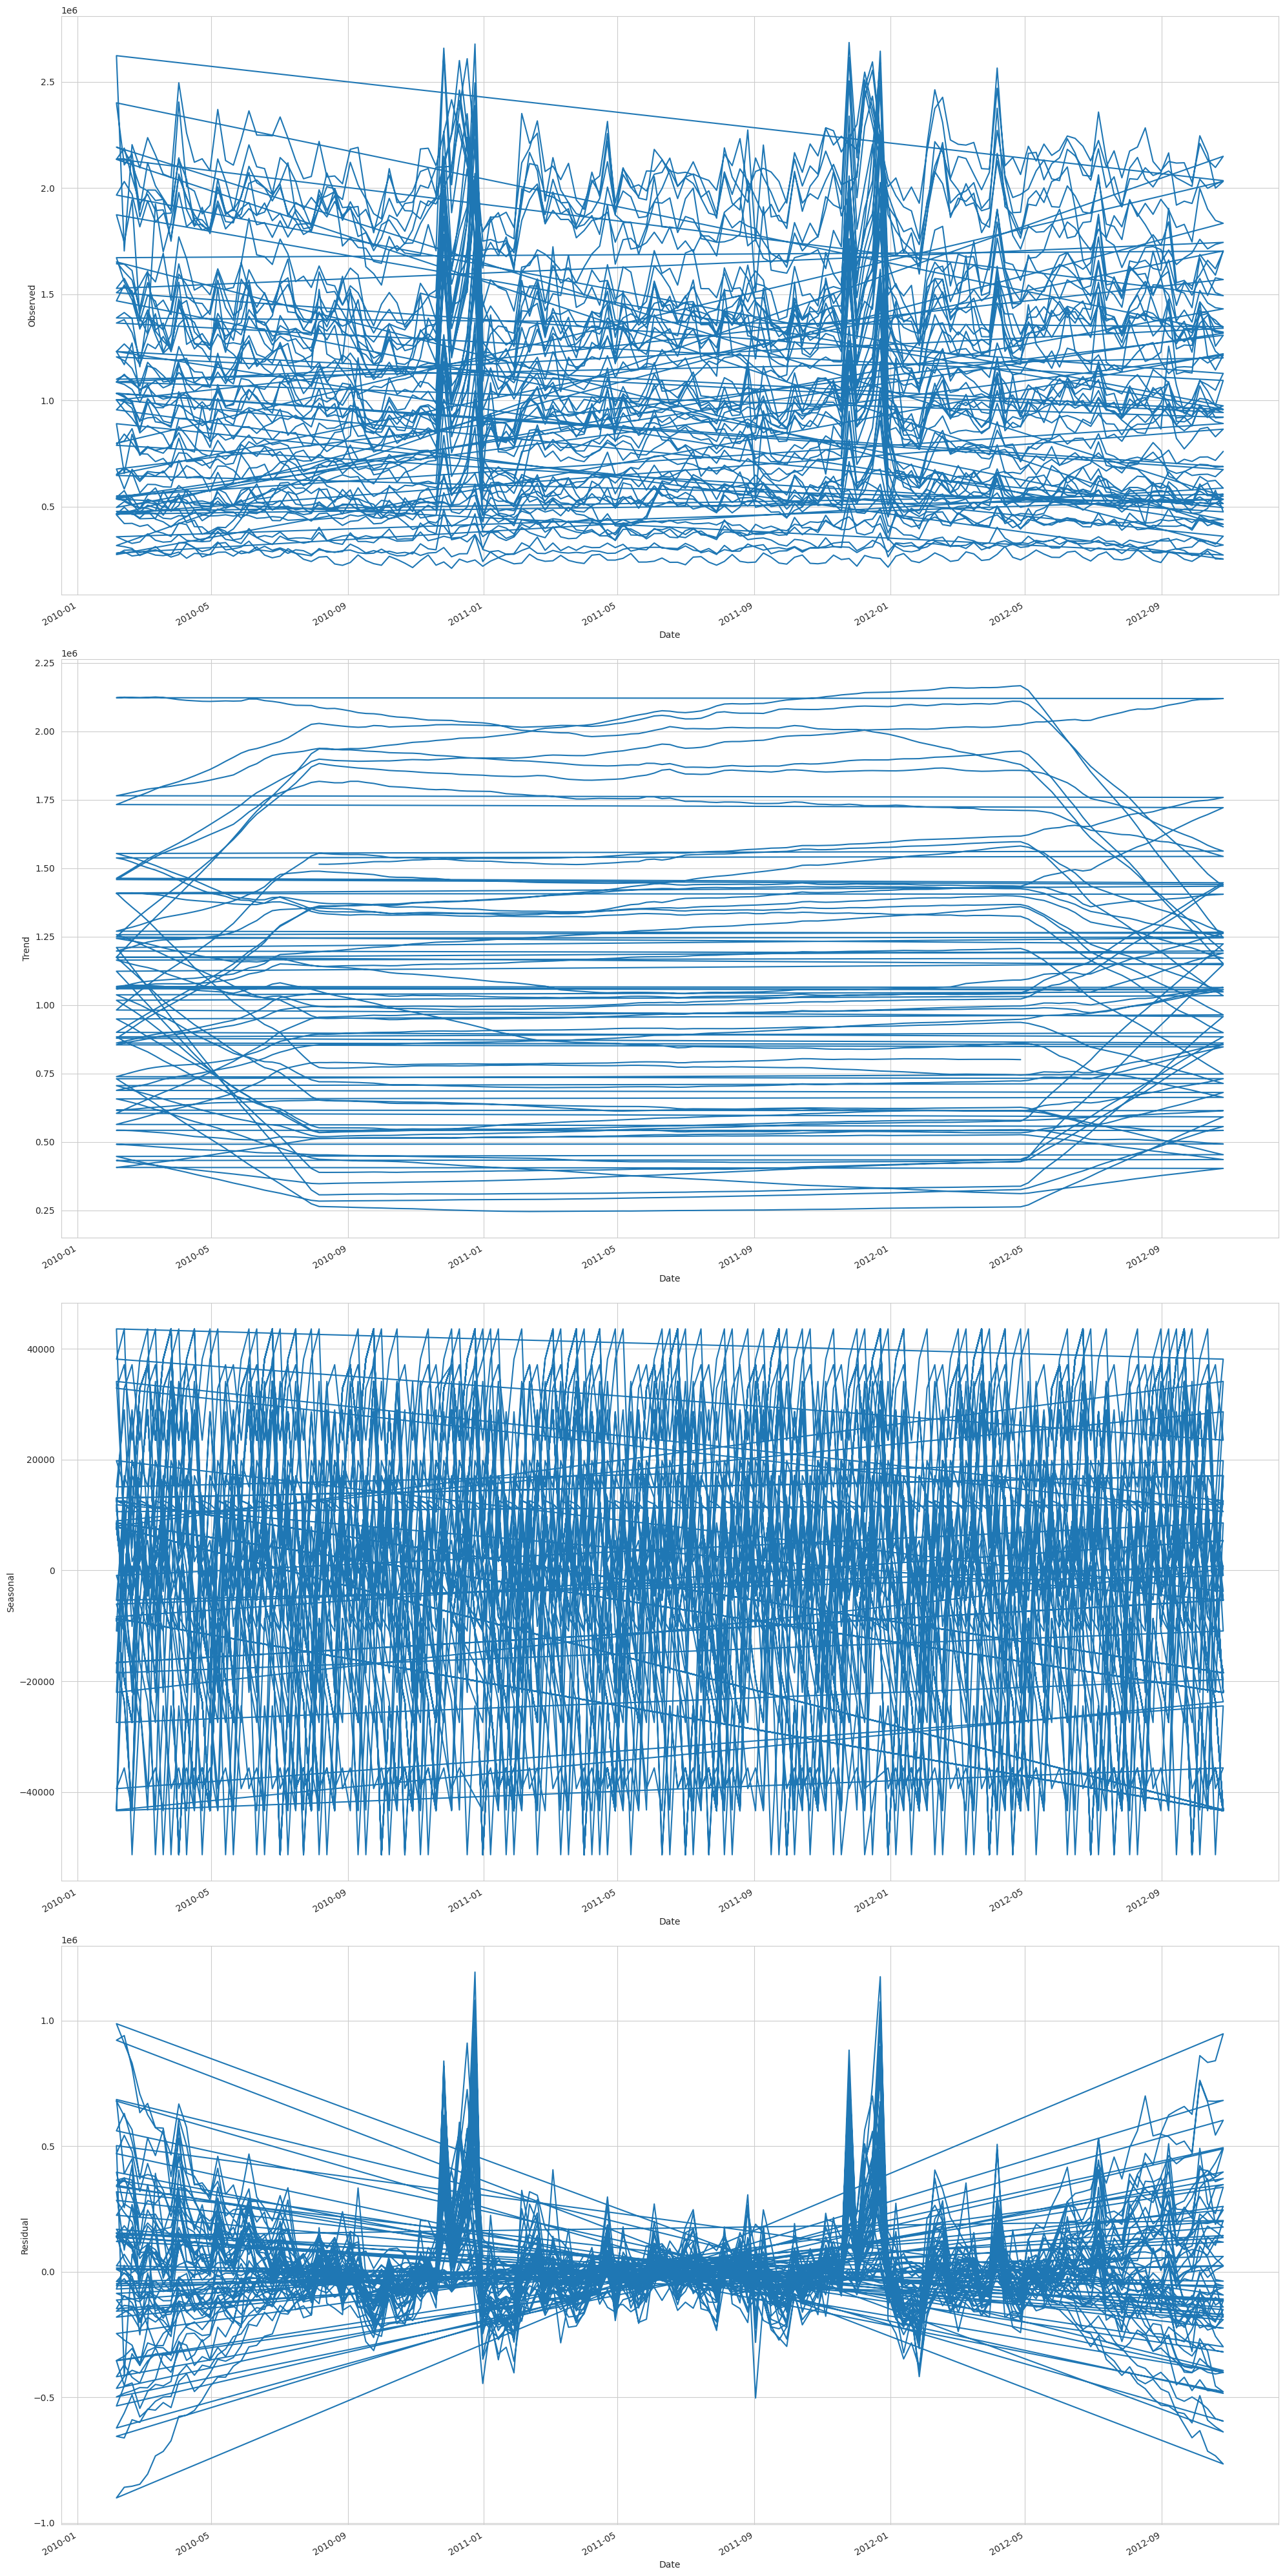

In [80]:
 #Apply time series analysis to identify seasonal trends:

# Use seasonal decomposition to identify seasonal, trend, and residual components
result = sm.tsa.seasonal_decompose(df_Walmart['Weekly_Sales'], model='additive', period=52)

# Plot the decomposed components
fig, ax = plt.subplots(4, 1, figsize=(20, 40))
result.observed.plot(ax=ax[0])
ax[0].set_ylabel('Observed')
result.trend.plot(ax=ax[1])
ax[1].set_ylabel('Trend')
result.seasonal.plot(ax=ax[2])
ax[2].set_ylabel('Seasonal')
result.resid.plot(ax=ax[3])
ax[3].set_ylabel('Residual')

plt.tight_layout()
plt.show()

<font color="#0000CD"><h2>Future Possibilities </font>

1. **Advanced Predictive Modeling**: While the current models (Decision Tree, Random Forest, XGBoost) provided satisfactory results, future work could explore more advanced forecasting models, including neural networks and time series models like ARIMA or SARIMA.

2. **Dynamic Feature Engineering**: Incorporate additional features or engineered features to enhance model accuracy. For example, adding promotional events, economic indicators, or regional data could provide a more comprehensive understanding of sales dynamics.

3. **Fine-Tuning Models**: Further hyperparameter tuning and optimization of the selected models could improve their predictive performance. Grid search techniques and Bayesian optimization can be explored for this purpose.

4. **Dynamic Inventory Management**: Utilize insights gained to optimize inventory management strategies. Understanding the impact of external factors can help Walmart plan for demand fluctuations and reduce stockouts or overstock situations.

5. **Real-Time Data Integration**: Implement real-time data integration to capture the most recent information. This would enable Walmart to adapt its strategies promptly based on changing economic conditions, consumer behavior, or external events.

6. **Geospatial Analysis**: Incorporate geospatial analysis to understand the impact of location on sales. Factors such as population density, competition, and local events can play a crucial role in store performance.

7. **Customer Segmentation**: Analyze customer segmentation to tailor marketing and sales strategies for different consumer groups. This can be achieved by leveraging data on purchasing behavior, demographics, and preferences.

8. **Collaborative Filtering**: Implement collaborative filtering techniques to provide personalized recommendations to customers. This can enhance the customer shopping experience and potentially boost sales.
    
9. **Real-time Dashboard**: Developing a real-time dashboard to visualize the predicted versus actual sales, key performance indicators, and relevant metrics could assist stakeholders in making informed decisions promptly. This would enable quick reactions to emerging trends or anomalies.

By continuously refining models, incorporating new data sources, and adopting advanced analytics techniques, Walmart can stay ahead in the highly competitive retail landscape and make informed, data-driven decisions.

This concludes the analysis and provides a roadmap for future enhancements and strategic planning for Walmart's sales forecasting.


<font color="#0000CD"><h2>Conclusion </font>

In conclusion, the analysis of Walmart's sales data has provided valuable insights into various factors affecting weekly sales across its multiple stores. The key findings are:

1. **Unemployment Impact**: There is a negative correlation between Weekly Sales and Unemployment Rate. Some stores show a stronger negative correlation, indicating that economic conditions may influence sales.

2. **Seasonal Trends**: The analysis suggests the presence of seasonal trends, especially during holiday weeks, which significantly impact Weekly Sales. This insight can help Walmart better prepare for peak sales periods.

3. **Temperature Influence**: Temperature appears to have an impact on Weekly Sales, with a slight positive correlation. Further analysis indicates that during colder months, sales tend to increase.

4. **CPI and Fuel Prices**: The Consumer Price Index (CPI) shows varying impacts on Weekly Sales across different stores. Fuel prices also exhibit an influence on sales, but the relationship is not as straightforward.

5. **Store Performance**: The analysis identifies top-performing and worst-performing stores based on yearly sales trends. Understanding the performance of individual stores can guide strategic decision-making.

6. **Statistical Analysis**: Detailed statistical measures, including range, average sales, standard deviation, and coefficient of variance, were computed to assess the significance of the difference between the highest and lowest performing stores.
    
7. **The predictive modeling**: The predictive models, particularly XGBoost, demonstrated strong performance in forecasting weekly sales. However, the future possibilities outlined suggest avenues for further refinement and enhancement of the forecasting process.    

<font color="#0000CD"><h2>References</h2></font>

Box, G. E. P., Jenkins, G. M., Reinsel, G. C., & Ljung, G. M. (2015). Time Series Analysis: Forecasting and Control. Wiley.
Chen, T., & Guestrin, C. (2016). XGBoost: A Scalable Tree Boosting System. In Proceedings of the 22nd ACM SIGKDD International Conference on Knowledge Discovery and Data Mining (KDD '16).
Hyndman, R. J., & Athanasopoulos, G. (2018). Forecasting: Principles and Practice. OTexts.
Pedregosa, F., et al. (2011). Scikit-learn: Machine Learning in Python. Journal of Machine Learning Research, 12, 2825–2830.
Zhang, G. P. (2003). Time series forecasting using a hybrid ARIMA and neural network model. Neurocomputing, 50, 159-175.